In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("ProjektDataMining/churn.xlsx", sheet_name="CHURN")

# Opis zbioru danych

Dane opisują klientów firmy telekomunikacyjnej. Klienci używają tzw. produktów pre-paid i często zmieniają operatora (około 1,5% klientów zmienia operatora miesięcznie) - proces ten nazywa się churnem.

Celem analizy jest segmentacja klientów na tych którzy zmieniają często operatora i tych którzy tego nie robią.

Atrybuty opisujące klienta:
- ID
- Churn (1=yes, 0=No) - jakościowy opis klienta
- Profit - ilościowy opis klienta
- Age
- Cancelled - 0 = aktywny
- Months since start
- Way of payment
- Promotion - status akcji promocyjnych (0=bez)
- Region
- Profit segment
- Sex
- Tariff model
- Academic title
- Revenue from calls (3 months ago)
- Fixed revenue (3 months ago)
- Revenue from roaming (3 months ago)
- Total revenue (3 months ago)
- Airtime to data service (1 month ago) - Airtime czas spędzony na rozmowie przez telefon komórkowy
- Airtime incoming (1 month ago)
- Airtime to mobile (1 month ago)
- Calls to data service (3 months ago)
- Calls incoming (3 months ago)
- Calls roaming (3 months ago)

In [3]:
df = df.drop(['ID'], axis=1)
df.head()

Churn (1=yes, 0=No)      Profit  Age  Cancelled  Months since start  \
0                    0   25.409096   21          0                  14   
1                    1  572.107602   29          0                  26   
2                    0   57.456634   20          0                  10   
3                    1  292.595896   47          1                  29   
4                    0    6.599228   47          0                  10   

   Way of payment  Promotion Region Profit segment     Sex  ...  \
0  Standing Order          0      0              D  Female  ...   
1  Standing Order          0      7              B    Male  ...   
2  Standing Order          0      1              D  Female  ...   
3  Standing Order          0      5              A    Male  ...   
4  Standing Order          0      7              D    Male  ...   

   Revenue from calls (3 months ago)  Fixed revenue (3 months ago)  \
0                           7.827187                          0.00   
1                         436.528877                          0.00   
2                          69.884354                         28.12   
3                         419.516818                         62.60   
4                          12.092878                          0.00   

   Revenue from roaming (3 months ago)  Total revenue (3 months ago)  \
0                                  0.0                      7.827187   
1                                  0.0                    436.528877   
2                                  0.0                     98.004354   
3                                  0.0                    482.116818   
4                                  0.0                     12.092878   

   Airtime to data service (1 month ago)  Airtime incoming (1 month ago)  \
0                                    0.0                     1105.413331   
1                                    0.0                    54991.234822   
2                                    0.0                      684.385557   
3                                    0.0                    12523.260237   
4                                    0.0                     2531.737199   

   Airtime to mobile (1 month ago)  Calls to data service (3 months ago)  \
0                       439.863154                                     0   
1                     44696.346418                                     0   
2                       651.221462                                     0   
3                      4837.449854                                     0   
4                        73.926074                                     0   

   Calls incoming (3 months ago)  Calls roaming (3 months ago)  
0                             75                             0  
1                            199                             3  
2                             54                             0  
3                            134                             0  
4                             21                             0  

[5 rows x 22 columns]

In [4]:
df.describe()

Churn (1=yes, 0=No)        Profit           Age     Cancelled  \
count         11810.000000  11810.000000  11810.000000  11810.000000   
mean              0.100000    101.098452     28.219306      0.020237   
std               0.300013    209.927808      6.590383      0.140816   
min               0.000000      0.000000     20.000000      0.000000   
25%               0.000000     26.062782     24.000000      0.000000   
50%               0.000000     61.802175     27.000000      0.000000   
75%               0.000000    113.761592     31.000000      0.000000   
max               1.000000  11541.527297     50.000000      1.000000   

       Months since start  Promotion  Tariff model  Academic title  \
count        11810.000000    11810.0  11810.000000    11810.000000   
mean            16.807790        0.0     10.215072        0.024555   
std              9.520886        0.0      5.606525        0.154772   
min              6.000000        0.0      1.000000        0.000000   
25%             10.000000        0.0      5.000000        0.000000   
50%             14.000000        0.0      8.000000        0.000000   
75%             22.000000        0.0     16.000000        0.000000   
max             71.000000        0.0     18.000000        1.000000   

       Revenue from calls (3 months ago)  Fixed revenue (3 months ago)  \
count                       11810.000000                  11810.000000   
mean                           51.729468                     28.688493   
std                           105.807331                     11.855100   
min                             0.000000                      0.000000   
25%                             6.920331                     28.120000   
50%                            21.319532                     28.120000   
75%                            57.896985                     30.710000   
max                          2843.420175                     65.190000   

       Revenue from roaming (3 months ago)  Total revenue (3 months ago)  \
count                         11810.000000                  11810.000000   
mean                              8.611292                     89.029253   
std                              45.855806                    121.132813   
min                               0.000000                      0.000000   
25%                               0.000000                     36.048499   
50%                               0.000000                     54.066947   
75%                               0.000000                    100.208620   
max                             990.817981                   2874.130175   

       Airtime to data service (1 month ago)  Airtime incoming (1 month ago)  \
count                           11810.000000                    11810.000000   
mean                                0.087792                     2918.518792   
std                                 3.023441                     5246.237369   
min                                 0.000000                        0.000000   
25%                                 0.000000                      155.317780   
50%                                 0.000000                      878.190495   
75%                                 0.000000                     3534.272460   
max                               116.934334                    64615.684971   

       Airtime to mobile (1 month ago)  Calls to data service (3 months ago)  \
count                     11810.000000                               11810.0   
mean                       1137.365030                                   0.0   
std                        3272.294606                                   0.0   
min                           0.000000                                   0.0   
25%                           0.000000                                   0.0   
50%                         147.513869                                   0.0   
75%                         911.889711                                   0.0   
max           

In [5]:
df2 = df
df2.head()

Churn (1=yes, 0=No)      Profit  Age  Cancelled  Months since start  \
0                    0   25.409096   21          0                  14   
1                    1  572.107602   29          0                  26   
2                    0   57.456634   20          0                  10   
3                    1  292.595896   47          1                  29   
4                    0    6.599228   47          0                  10   

   Way of payment  Promotion Region Profit segment     Sex  ...  \
0  Standing Order          0      0              D  Female  ...   
1  Standing Order          0      7              B    Male  ...   
2  Standing Order          0      1              D  Female  ...   
3  Standing Order          0      5              A    Male  ...   
4  Standing Order          0      7              D    Male  ...   

   Revenue from calls (3 months ago)  Fixed revenue (3 months ago)  \
0                           7.827187                          0.00   
1                         436.528877                          0.00   
2                          69.884354                         28.12   
3                         419.516818                         62.60   
4                          12.092878                          0.00   

   Revenue from roaming (3 months ago)  Total revenue (3 months ago)  \
0                                  0.0                      7.827187   
1                                  0.0                    436.528877   
2                                  0.0                     98.004354   
3                                  0.0                    482.116818   
4                                  0.0                     12.092878   

   Airtime to data service (1 month ago)  Airtime incoming (1 month ago)  \
0                                    0.0                     1105.413331   
1                                    0.0                    54991.234822   
2                                    0.0                      684.385557   
3                                    0.0                    12523.260237   
4                                    0.0                     2531.737199   

   Airtime to mobile (1 month ago)  Calls to data service (3 months ago)  \
0                       439.863154                                     0   
1                     44696.346418                                     0   
2                       651.221462                                     0   
3                      4837.449854                                     0   
4                        73.926074                                     0   

   Calls incoming (3 months ago)  Calls roaming (3 months ago)  
0                             75                             0  
1                            199                             3  
2                             54                             0  
3                            134                             0  
4                             21                             0  

[5 rows x 22 columns]

In [6]:
df2 = df2.drop(columns=["Churn (1=yes, 0=No)","Profit","Region"])
df2 = pd.get_dummies(df2, columns = ["Sex"])
df2 = pd.get_dummies(df2, columns = ["Way of payment"])
df2 = pd.get_dummies(df2, columns = ["Profit segment"])

# Przygotowanie danych

Sprawdzenie ile jest wartości NaN w zbiorze danych

In [7]:
df.isnull().sum()

Churn (1=yes, 0=No)                      0
Profit                                   0
Age                                      0
Cancelled                                0
Months since start                       0
Way of payment                           0
Promotion                                0
Region                                   0
Profit segment                           0
Sex                                      0
Tariff model                             0
Academic title                           0
Revenue from calls (3 months ago)        0
Fixed revenue (3 months ago)             0
Revenue from roaming (3 months ago)      0
Total revenue (3 months ago)             0
Airtime to data service (1 month ago)    0
Airtime incoming (1 month ago)           0
Airtime to mobile (1 month ago)          0
Calls to data service (3 months ago)     0
Calls incoming (3 months ago)            0
Calls roaming (3 months ago)             0
dtype: int64

Text(0.5, 1.0, 'Class Distributions \n 0: no churn   1: churn')

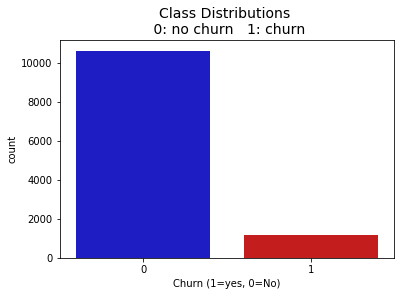

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Churn (1=yes, 0=No)', data=df, palette=colors)
plt.title('Class Distributions \n 0: no churn   1: churn', fontsize=14)

In [9]:
y=df["Churn (1=yes, 0=No)"]

C:\Users\Mateusz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0536726  0.00186946 0.06855399 0.         0.03489135 0.00615646
 0.06892571 0.04362322 0.03705806 0.09562264 0.00075254 0.10144772
 0.15063282 0.         0.07088087 0.05685334 0.01151599 0.00997632
 0.00542322 0.00553143 0.05657193 0.04746974 0.01712488 0.04709402
 0.0083517 ]


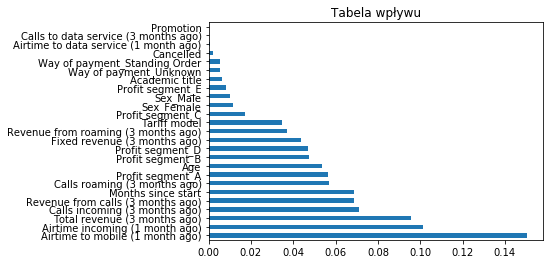

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(df2,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=df2.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.title('Tabela wpływu')
plt.show()

In [11]:
df.dtypes

Churn (1=yes, 0=No)                        int64
Profit                                   float64
Age                                        int64
Cancelled                                  int64
Months since start                         int64
Way of payment                            object
Promotion                                  int64
Region                                    object
Profit segment                            object
Sex                                       object
Tariff model                               int64
Academic title                             int64
Revenue from calls (3 months ago)        float64
Fixed revenue (3 months ago)             float64
Revenue from roaming (3 months ago)      float64
Total revenue (3 months ago)             float64
Airtime to data service (1 month ago)    float64
Airtime incoming (1 month ago)           float64
Airtime to mobile (1 month ago)          float64
Calls to data service (3 months ago)       int64
Calls incoming (3 mo

Sprawdzenie korelacji

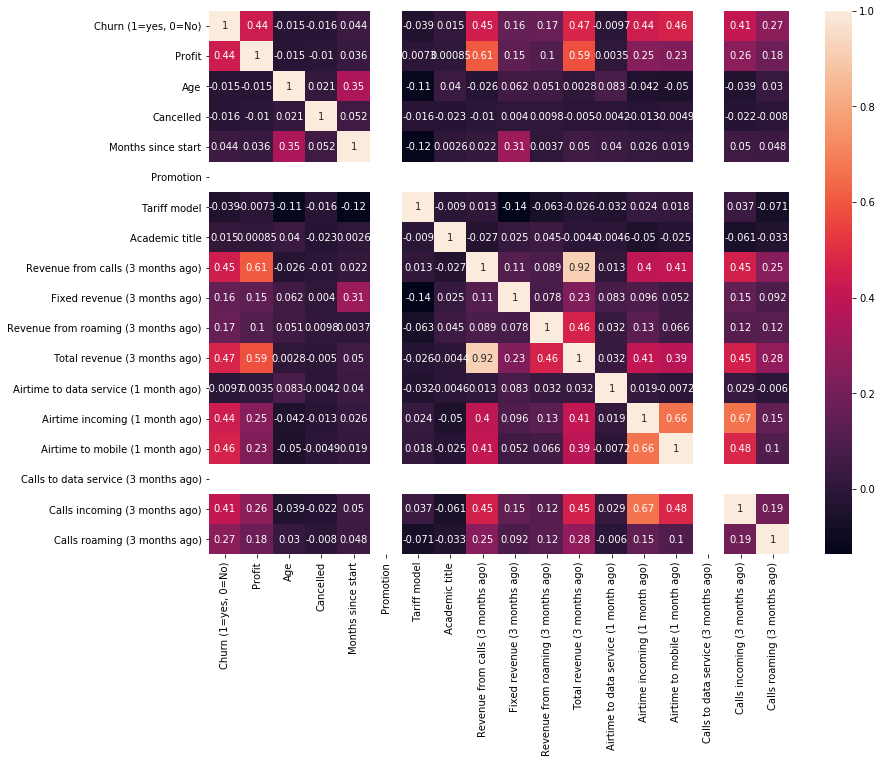

In [12]:
fig = plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True)

Total revenue (3 months ago) zostało usunięte z powodu korelacji na poziomie 0.92

In [13]:
df = df.drop(columns=["Revenue from calls (3 months ago)","Promotion","Calls to data service (3 months ago)","Airtime to data service (1 month ago)","Cancelled"])

In [14]:
df.head()

Churn (1=yes, 0=No)      Profit  Age  Months since start  Way of payment  \
0                    0   25.409096   21                  14  Standing Order   
1                    1  572.107602   29                  26  Standing Order   
2                    0   57.456634   20                  10  Standing Order   
3                    1  292.595896   47                  29  Standing Order   
4                    0    6.599228   47                  10  Standing Order   

  Region Profit segment     Sex  Tariff model  Academic title  \
0      0              D  Female             5               0   
1      7              B    Male             8               0   
2      1              D  Female             5               0   
3      5              A    Male            18               0   
4      7              D    Male             8               0   

   Fixed revenue (3 months ago)  Revenue from roaming (3 months ago)  \
0                          0.00                                  0.0   
1                          0.00                                  0.0   
2                         28.12                                  0.0   
3                         62.60                                  0.0   
4                          0.00                                  0.0   

   Total revenue (3 months ago)  Airtime incoming (1 month ago)  \
0                      7.827187                     1105.413331   
1                    436.528877                    54991.234822   
2                     98.004354                      684.385557   
3                    482.116818                    12523.260237   
4                     12.092878                     2531.737199   

   Airtime to mobile (1 month ago)  Calls incoming (3 months ago)  \
0                       439.863154                             75   
1                     44696.346418                            199   
2                       651.221462                             54   
3                      4837.449854                            134   
4                        73.926074                             21   

   Calls roaming (3 months ago)  
0                             0  
1                             3  
2                             0  
3                             0  
4                             0

In [15]:
df = df.drop(columns="Region")
df = df.drop(columns="Way of payment")

In [16]:
df = df.drop(columns=["Churn (1=yes, 0=No)","Profit"])

In [17]:
df = pd.get_dummies(df, columns = ["Sex"])

In [18]:
df = pd.get_dummies(df, columns = ["Profit segment"])

In [19]:
df.head()

Age  Months since start  Tariff model  Academic title  \
0   21                  14             5               0   
1   29                  26             8               0   
2   20                  10             5               0   
3   47                  29            18               0   
4   47                  10             8               0   

   Fixed revenue (3 months ago)  Revenue from roaming (3 months ago)  \
0                          0.00                                  0.0   
1                          0.00                                  0.0   
2                         28.12                                  0.0   
3                         62.60                                  0.0   
4                          0.00                                  0.0   

   Total revenue (3 months ago)  Airtime incoming (1 month ago)  \
0                      7.827187                     1105.413331   
1                    436.528877                    54991.234822   
2                     98.004354                      684.385557   
3                    482.116818                    12523.260237   
4                     12.092878                     2531.737199   

   Airtime to mobile (1 month ago)  Calls incoming (3 months ago)  \
0                       439.863154                             75   
1                     44696.346418                            199   
2                       651.221462                             54   
3                      4837.449854                            134   
4                        73.926074                             21   

   Calls roaming (3 months ago)  Sex_Female  Sex_Male  Profit segment_A  \
0                             0           1         0                 0   
1                             3           0         1                 0   
2                             0           1         0                 0   
3                             0           0         1                 1   
4                             0           0         1                 0   

   Profit segment_B  Profit segment_C  Profit segment_D  Profit segment_E  
0                 0                 0                 1                 0  
1                 1                 0                 0                 0  
2                 0                 0                 1                 0  
3                 0                 0                 0                 0  
4                 0                 0                 1                 0

In [20]:
df.describe()

Age  Months since start  Tariff model  Academic title  \
count  11810.000000        11810.000000  11810.000000    11810.000000   
mean      28.219306           16.807790     10.215072        0.024555   
std        6.590383            9.520886      5.606525        0.154772   
min       20.000000            6.000000      1.000000        0.000000   
25%       24.000000           10.000000      5.000000        0.000000   
50%       27.000000           14.000000      8.000000        0.000000   
75%       31.000000           22.000000     16.000000        0.000000   
max       50.000000           71.000000     18.000000        1.000000   

       Fixed revenue (3 months ago)  Revenue from roaming (3 months ago)  \
count                  11810.000000                         11810.000000   
mean                      28.688493                             8.611292   
std                       11.855100                            45.855806   
min                        0.000000                             0.000000   
25%                       28.120000                             0.000000   
50%                       28.120000                             0.000000   
75%                       30.710000                             0.000000   
max                       65.190000                           990.817981   

       Total revenue (3 months ago)  Airtime incoming (1 month ago)  \
count                  11810.000000                    11810.000000   
mean                      89.029253                     2918.518792   
std                      121.132813                     5246.237369   
min                        0.000000                        0.000000   
25%                       36.048499                      155.317780   
50%                       54.066947                      878.190495   
75%                      100.208620                     3534.272460   
max                     2874.130175                    64615.684971   

       Airtime to mobile (1 month ago)  Calls incoming (3 months ago)  \
count                     11810.000000                   11810.000000   
mean                       1137.365030                      35.549958   
std                        3272.294606                      51.172809   
min                           0.000000                       0.000000   
25%                           0.000000                       4.000000   
50%                         147.513869                      17.000000   
75%                         911.889711                      47.000000   
max                       56154.459996                     643.000000   

       Calls roaming (3 months ago)    Sex_Female      Sex_Male  \
count                  11810.000000  11810.000000  11810.000000   
mean                       0.611262      0.240474      0.759526   
std                        2.939251      0.427390      0.427390   
min                        0.000000      0.000000      0.000000   
25%                        0.000000      0.000000      1.000000   
50%                        0.000000      0.000000      1.000000   
75%                        0.000000      0.000000      1.000000   
max                       46.000000      1.000000      1.000000   

       Profit segment_A  Profit segment_B  Profit segment_C  Profit segment_D  \
count      11810.000000      11810.000000      11810.000000      11810.000000   
mean           0.013548          0.077053          0.189670          0.604572   
std            0.115609          0.266687          0.392056          0.488963   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          1.000000   
75%            0.000000          0.000000          0.000000          1.000000   
max            1.000000          1.000000          1.000000          1.000000   

       Profit segment_E  
count      1181

# Standaryzacja danych

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
df_standarized = scaler.transform(df)

# Budowa modeli klasyfikacyjnych

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_standarized, y, test_size=0.2, random_state=2)

1.Model statystyczny oparty na dyskryminacji

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
#model_lda.score(X_test, y_test)

C:\Users\Mateusz\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [26]:
from sklearn.metrics import accuracy_score
predictionsLDA = model_lda.predict(X_test)
accuracy_score(y_test, predictionsLDA) * 100

92.84504657070279

2.Model sieci neuronowej

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=400, random_state=2)

In [29]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
predictionsMLP = mlp.predict(X_test)

In [31]:
accuracy_score(y_test, predictionsMLP) * 100

97.2904318374259

3.Model Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc = RandomForestClassifier(max_depth=4, random_state=2)
rfc.fit(X_train, y_train)

C:\Users\Mateusz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [33]:
predictionsRFC = rfc.predict(X_test)

In [34]:
accuracy_score(y_test, predictionsRFC) * 100

93.64944961896697

# Porównanie wybranych modeli

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictionsMLP)
fpr1, tpr1, thresholds1 = roc_curve(y_test, predictionsRFC)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predictionsLDA)

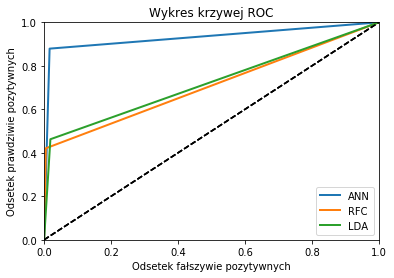

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Odsetek fałszywie pozytywnych')
    plt.ylabel('Odsetek prawdziwie pozytywnych')
    plt.title('Wykres krzywej ROC')
    plt.legend()
    
plot_roc_curve(fpr, tpr, "ANN")
plot_roc_curve(fpr1, tpr1, "RFC")
plot_roc_curve(fpr2, tpr2, "LDA")
plt.show()


In [37]:
from sklearn.metrics import roc_auc_score

print("Obszar AUC dla LDA:",roc_auc_score(y_test, predictionsLDA))

Obszar AUC dla LDA: 0.7218249293119698


In [38]:
print("Obszar AUC dla sztucznej sieci neuronowej:",roc_auc_score(y_test, predictionsMLP))

Obszar AUC dla sztucznej sieci neuronowej: 0.931336396481307


In [39]:
print("Obszar AUC dla lasów losowych:",roc_auc_score(y_test, predictionsRFC))

Obszar AUC dla lasów losowych: 0.7078247722274584


# Dyskusja porównawcza

Do projektu wykorzystałem dane udostępnione nam na zajęciach dla tematu: "Segmentacja klientów pod kątem ich lojalności".
Niepotrzebnych zmiennych pozbyłem się z pomocą tablicy korelacji (zmienna "Revenue from calls (3 months ago)") oraz tabeli wpływu zmiennych (zmienne "Promotion", "Calls to data service (3 months ago)", "Airtime to data service (1 month ago)", "Cancelled"). Z tabeli wpłwu możemy zauważyć, że najważniejszą zmienną jest są Airtime to mobile (1 month ago).

Do weryfikacji wyników użyłem metryki AUC ROC.
Najlepszy wynik AUC osiągnął model sztucznej sieci neuronowej na poziomie 0.93, gdzie liniowa analiza dyskryminacyjna 0.72, a lasy losowe osiągneły 0.707. Uważam, że wynik AUC dla modelu sieci neuronowej jest zadowalający. Jeżeli chcielibyśmy go jednak poprawić to myślę, że problemu należy upatrywać w zbyt małej ilości danych oraz dużej różnicy ilości danych dla stałych klientów i tak zwanego "Churn".

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
print("Macierz pomyłek:")
confusion_matrix(y_test, predictionsMLP)

Macierz pomyłek:


array([[2087,   35],
       [  29,  211]], dtype=int64)

In [42]:
from sklearn.metrics import precision_score, recall_score
print("Precyzja",precision_score(y_test, predictionsMLP))

Precyzja 0.8577235772357723


In [43]:
print("Pełność",recall_score(y_test, predictionsMLP))

Pełność 0.8791666666666667


Z macierzy pomyłek wynika, że model wskazuje dość dobrze kategorie stałych klientów,
za to zauważalnie gorzej radzi sobie z klientami tymczasowymi o których mamy zdecydowanie mniej danych.

Model gdy rozpoznaje klienta tymczasowego nie myli się w 85% przypadków, zaś prawidłowo rozpoznaje 87% klientów tymczasowych.